# Warmup

## Simpson's Paradox
- A relationship between two variables reverses itself when a third variable is introduced.
- The distribution between each variable may have a different number of observations.
- Visualize the interactions between multiple variables, especially subgroups.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

## 1.
For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    

In [2]:
df1.shape

(200, 3)

In [3]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [26]:
# create subgroups to setup see the distribution of each group
# Use the visual to aid the formulation of hypothesis tests
one = df1[df1.time=='one']
two = df1[df1.time=='two']

In [27]:
# The subgroups have the same number of observations.
print(df1.time.value_counts())

two    100
one    100
Name: time, dtype: int64


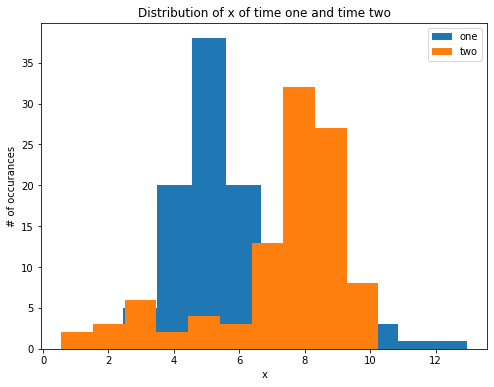

In [16]:
# increase the default size of the chart
plt.figure(figsize=(8, 6))

# plot the data of each subgroup. Assign the appropriate labels.
plt.hist(one.x, label='one')
plt.hist(two.x, label='two')

# Add axis labels to explicitly define the data being displayed.
plt.title('Distribution of x of time one and time two')
plt.xlabel('x')
plt.ylabel('# of occurances')
plt.legend();

In [65]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [62]:
df1.groupby(['group', 'time']).count()

x
group time    
a     one   87
      two   15
b     one   13
      two   85

### Hypothesis Test

Does x significantly increase from time one to time two?

Hypthosesis Test Type: __One tailed, Two Sample T-Test__

Null Hypothesis<br>
$H0$ The mean of x of time two is less than or equal to the mean of x of time one.<br><br>
Alternative Hypothesis<br>
$H1$ The mean of x time two is greater than the mean x of time one.

In [17]:
# Set up confidence interval and alpha for statistical tests.
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [19]:
# Grab the feature of each subgroup that will be used in the t test.
time_one = one.x
time_two = two.x

In [22]:
t, p = stats.ttest_ind(time_one, time_two)

if p < alpha:
    print("Reject the Null Hypothesis. The mean of x of time two is significantly greater than the mean x of time one. ")
    print(f"p-value: {p:.2f}")
else:
    print("Fail to reject the null hypothesis.")

Reject the Null Hypothesis. The mean of x of time two is significantly greater than the mean x of time one. 
p-value: 0.00


## 2.
For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

In [28]:
df2.shape

(200, 3)

In [29]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


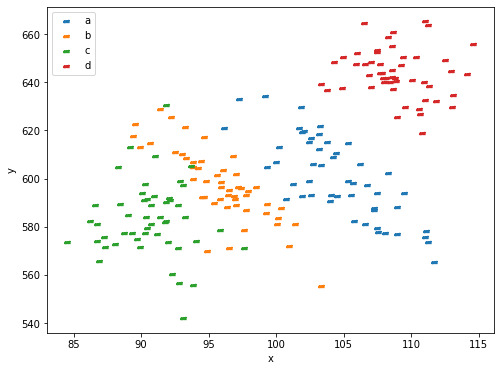

In [84]:
groups = df2.groupby('group')

plt.figure(figsize=(8, 6))
for group_name, group in groups:
    plt.scatter(x='x', y='y', data=group, marker="$ant$", label=group_name)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [73]:
r, p = stats.pearsonr(df2.x, df2.y)
print(f"r={r:.2f}")

r=0.57


## 3.
For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon should you go to?

In [53]:
df3.shape

(1000, 3)

In [54]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [57]:
df3.groupby(['surgeon', 'surgery'])['success'].mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [60]:
# `.size()` returns the same data as `.count()`
df3.groupby(['surgeon', 'surgery'])['success'].count()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
Name: success, dtype: int64

If I was needing open heart surgery, I would go with Surgeon B, Bobby.

## 4.
For `df1` and `df2`, what happens to the relationships if you take into account the `group` feature?

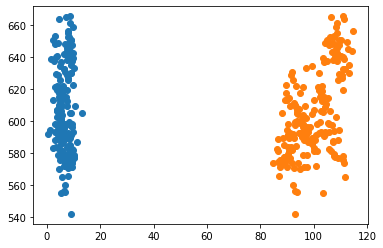

In [74]:
df1_x = df1.x
df2_x = df2.x
df2_y = df2.y

plt.scatter(df1_x, df2_y)
plt.scatter(df2_x, df2_y);